In [ ]:
!pip install tensorflow opencv-python

In [ ]:
import os
import cv2
import PIL
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# New Section

In [ ]:
#create resizedata folder

folder_path = '/content/resizedata'

if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"The folder at {folder_path} was created.")
else:
    print(f"The folder at {folder_path} already exists.")


The folder at /content/resizedata was created.


In [ ]:
# Define constants
IMAGE_SIZE = (224, 224)
DATA_DIR = "/content/drive/MyDrive/DataSet"
SAVE_DIR = "/content/resizedata"



In [ ]:
##Step 1: Load and Resize Images
TARGET_IMAGE_WIDTH = 224
TARGET_IMAGE_HEIGHT = 224
def load_and_resize_images(folder_path):
    images = []
    labels = []
    # Get the label (0 for "real", 1 for "fake") based on the folder name
    label = 0 if "real" in folder_path else 1
    for image_file in os.listdir(folder_path):
      image_path = os.path.join(folder_path, image_file)
      image = cv2.imread(image_path)
      image = cv2.resize(image, (TARGET_IMAGE_WIDTH, TARGET_IMAGE_HEIGHT))
      images.append(image)
      labels.append(label)
    images = np.array(images)
    labels = np.array(labels)
    return images,labels
    #for label, class_folder in enumerate(os.listdir(folder_path)):
        #class_path = os.path.join(folder_path, class_folder)
       # for image_file in os.listdir(class_path):
           # image_path = os.path.join(class_path, image_file)


In [ ]:
## Load real images and Load fake images
# Correct usage
real_folder_path="/content/drive/MyDrive/DataSet/real_folder"
fake_folder_path="/content/drive/MyDrive/DataSet/fake_folder"
real_images, real_labels = load_and_resize_images(real_folder_path)
fake_images, fake_labels = load_and_resize_images(fake_folder_path)

(real_images.shape)
(real_images.size)
print(f"real images {real_images},real lables {real_labels}")
print(f"fake images {fake_images},fake lables{fake_labels}")

In [ ]:

#check real or fake folder existance
real_folder_path = os.path.join(DATA_DIR, "real_folder")
fake_folder_path = os.path.join(DATA_DIR, "fake_folder")

print("Real Folder Path:", real_folder_path)
print("Fake Folder Path:", fake_folder_path)

print("Content of DataSet Directory:", os.listdir("/content/drive/MyDrive/DataSet/"))

In [ ]:
##Combine and shuffle data
all_images = np.concatenate([real_images, fake_images], axis=0)
all_labels = np.concatenate([real_labels, fake_labels], axis=0)
#all_images,all_labels

In [ ]:
print("Total number of samples:", len(all_images))


Total number of samples: 99


In [ ]:
## Step 2: Data Augmentation (Optional)
# Apply augmentation techniques to artificially increase dataset size (use TensorFlow's ImageDataGenerator)
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

import os
from PIL import Image
import numpy as np

def load_original_data(data_folder):
    images = []
    labels = []

    for subfolder in os.listdir(data_folder):
        subfolder_path = os.path.join(data_folder, subfolder)
        if os.path.isdir(subfolder_path):
            sub_images, sub_labels = load_images_from_subfolder(subfolder_path)
            images.extend(sub_images)
            labels.extend(sub_labels)

    return images, labels

desired_width = 224
desired_height = 224
def load_images_from_subfolder(subfolder_path):
    image_files = [f for f in os.listdir(subfolder_path) if f.endswith('.jpg')]
    images = []
    labels = []

    for file_name in image_files:
        label = 1 if 'fake' in file_name.lower() else 0
        image_path = os.path.join(subfolder_path, file_name)

        try:
            image = np.array(Image.open(image_path).convert('RGB').resize((desired_width, desired_height)))
            print(f"Loaded image '{image_path}' with shape {image.shape}")
        except Exception as e:
            print(f"Error loading image '{image_path}': {e}")
            continue

        images.append(image)
        labels.append(label)

    return images, labels
# Specify the path to your original data folders
data_folder_path_real = '/content/drive/MyDrive/DataSet/real_folder'
data_folder_path_fake = '/content/drive/MyDrive/DataSet/fake_folder'

# Load images and labels from the subfolders
original_images_real, original_labels_real = load_images_from_subfolder(data_folder_path_real)
original_images_fake, original_labels_fake = load_images_from_subfolder(data_folder_path_fake)

# Concatenate the results
original_images = original_images_real + original_images_fake
original_labels = original_labels_real + original_labels_fake

original_images = np.array(original_images)
original_labels = np.array(original_labels)

# Create an instance of the ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create lists to store augmented data
augmented_images_list = []
augmented_labels_list = []

# Target size for resizing augmented images
target_size = (224, 224)  # Adjust to your preferred size

# Generate augmented images and labels
for i in range(len(original_images)):
    img = original_images[i]
    label = original_labels[i]

    # Reshape the image to (1, height, width, channels) as datagen.flow expects a 4D array
    img = np.reshape(img, (1,) + img.shape)

    # Generate augmented images and labels individually
    augmented_data = [datagen.flow(img, [label], batch_size=1, shuffle=False).next() for _ in range(10)]

    # Resize augmented images to a consistent size
    augmented_data_resized = [
        (np.array(Image.fromarray(data[0][0].astype('uint8')).resize(target_size)), data[1][0])
        for data in augmented_data
    ]

    # Append augmented data to lists
    augmented_images_list.extend([data[0] for data in augmented_data_resized])
    augmented_labels_list.extend([data[1] for data in augmented_data_resized])

# Concatenate lists into arrays
augmented_images = np.vstack(augmented_images_list)
augmented_labels = np.hstack(augmented_labels_list)

# Print the shape of the augmented dataset
print("Augmented Images Shape:", augmented_images.shape)
print("Augmented Labels Shape:", augmented_labels.shape)

# Print the length of the loaded data to verify it's not None
print(augmented_images.shape, augmented_labels.shape)



In [ ]:
# Print the shape of the augmented dataset
print("Augmented Images Shape:", augmented_images.shape)
print("Augmented Labels Shape:", augmented_labels.shape)


Augmented Images Shape: (221760, 224, 3)
Augmented Labels Shape: (990,)


In [ ]:
# Reshape the augmented images to be compatible with train_test_split
X = augmented_images.reshape(-1, 224 * 3)
y = augmented_labels

# Print the shape before splitting
print("X Shape before split:", X.shape)
print("y Shape before split:", y.shape)


X Shape before split: (221760, 672)
y Shape before split: (990,)


In [ ]:
## Step 3: Train-Test Split
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Reshape the augmented images to be compatible with train_test_split
# Assuming the original shape is (224, 224, 3)
X = augmented_images.reshape(-1, 224, 224, 3)
y = augmented_labels

# Print the shape before splitting
print("X Shape before split:", X.shape)
print("y Shape before split:", y.shape)

# Ensure both X and y have the same number of samples
min_samples = min(X.shape[0], y.shape[0])
X = X[:min_samples]
y = y[:min_samples]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape after splitting
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)



X Shape before split: (990, 224, 224, 3)
y Shape before split: (990,)
X_train Shape: (792, 224, 224, 3)
X_test Shape: (198, 224, 224, 3)
y_train Shape: (792,)
y_test Shape: (198,)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# Compile the model
# Compile the model with a different optimizer (Adam) and learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Data normalization
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

# Data augmentation
datagen = ImageDataGenerator(rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
datagen.fit(X_train_normalized)

# Train the model with data augmentation
history = model.fit(datagen.flow(X_train_normalized, y_train, batch_size=32),epochs=25 ,validation_data=(X_test_normalized, y_test),callbacks=[early_stopping])


Epoch 1/25
25/25 [==============================] - 25s 537ms/step - loss: 1.0819 - accuracy: 0.5063 - val_loss: 0.7049 - val_accuracy: 0.4798
Epoch 2/25
25/25 [==============================] - 11s 456ms/step - loss: 0.6942 - accuracy: 0.5152 - val_loss: 0.6861 - val_accuracy: 0.5657
Epoch 3/25
25/25 [==============================] - 9s 369ms/step - loss: 0.6881 - accuracy: 0.5341 - val_loss: 0.6835 - val_accuracy: 0.5505
Epoch 4/25
25/25 [==============================] - 10s 381ms/step - loss: 0.6845 - accuracy: 0.5290 - val_loss: 0.6553 - val_accuracy: 0.6263
Epoch 5/25
25/25 [==============================] - 10s 406ms/step - loss: 0.6557 - accuracy: 0.6174 - val_loss: 0.6464 - val_accuracy: 0.6111
Epoch 6/25
25/25 [==============================] - 10s 406ms/step - loss: 0.6662 - accuracy: 0.6035 - val_loss: 0.6591 - val_accuracy: 0.5859
Epoch 7/25
25/25 [==============================] - 9s 342ms/step - loss: 0.6514 - accuracy: 0.5783 - val_loss: 0.6790 - val_accuracy: 0.5455
E

In [ ]:
from keras.applications import VGG16

# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(datagen.flow(X_train_normalized, y_train, batch_size=32),epochs=25,validation_data=(X_test_normalized, y_test),callbacks=[early_stopping])


58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/25
25/25 [==============================] - 31s 802ms/step - loss: 0.8319 - accuracy: 0.6124 - val_loss: 0.6319 - val_accuracy: 0.5707
Epoch 2/25
25/25 [==============================] - 16s 608ms/step - loss: 0.5587 - accuracy: 0.7525 - val_loss: 0.5998 - val_accuracy: 0.6313
Epoch 3/25
25/25 [==============================] - 13s 481ms/step - loss: 0.5303 - accuracy: 0.7386 - val_loss: 0.5160 - val_accuracy: 0.6869
Epoch 4/25
25/25 [==============================] - 11s 435ms/step - loss: 0.4948 - accuracy: 0.7753 - val_loss: 0.5331 - val_accuracy: 0.6818
Epoch 5/25
25/25 [==============================] - 11s 421ms/step - loss: 0.4025 - accuracy: 0.8169 - val_loss: 0.3461 - val_accuracy: 0.8333
Epoch 6/25
25/25 [==============================] - 12s 472ms/step - loss: 0.4028 - accuracy: 0.8144 - val_loss: 0.3288 - val_accuracy: 0.8232
Epoch 7/25
25/25 [==============================] - 12s 473ms/step - loss: 0.

7/7 [==============================] - 1s 119ms/step - loss: 0.1419 - accuracy: 0.9545
Test Accuracy: 0.9545454382896423


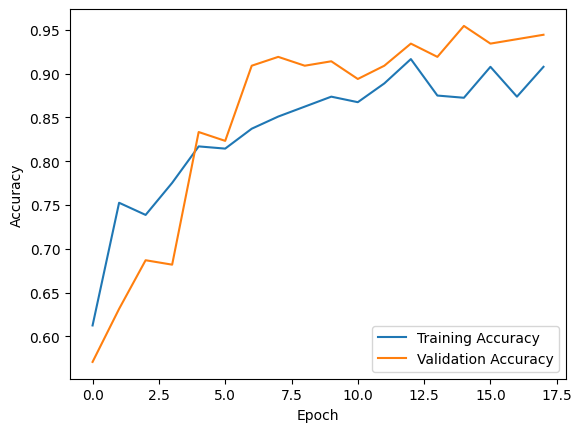

In [ ]:
#vgg16 graph visualization
accuracy = model.evaluate(X_test_normalized, y_test)[1]
print("Test Accuracy:", accuracy)

# Plot learning curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
!mkdir -p trainmodel
model_path = '/content/trainmodel/train_model.keras'

# Save the model
model.save(model_path)

print(f"Model saved to: {model_path}")


Model saved to: /content/trainmodel/train_model.keras


In [ ]:
accuracy = model.evaluate(X_test_normalized, y_test)[1]
print("Test Accuracy:", accuracy)

7/7 [==============================] - 1s 121ms/step - loss: 0.1419 - accuracy: 0.9545
Test Accuracy: 0.9545454382896423


In [ ]:
from sklearn.metrics import classification_report

# Predict the classes on the test set
y_pred = (model.predict(X_test_normalized) > 0.5).astype("int32")

# Print classification report
print(classification_report(y_test, y_pred))


7/7 [==============================] - 1s 133ms/step
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        95
           1       0.95      0.96      0.96       103

    accuracy                           0.95       198
   macro avg       0.95      0.95      0.95       198
weighted avg       0.95      0.95      0.95       198



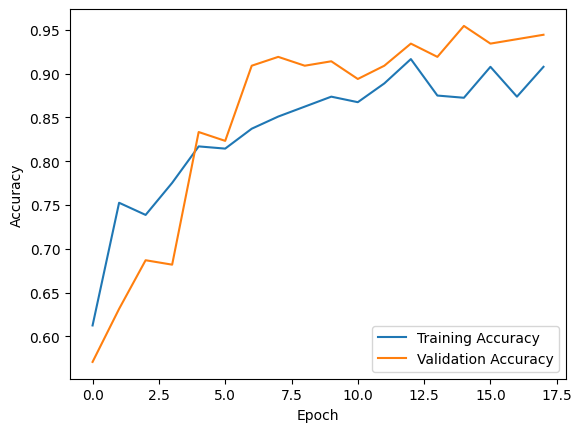

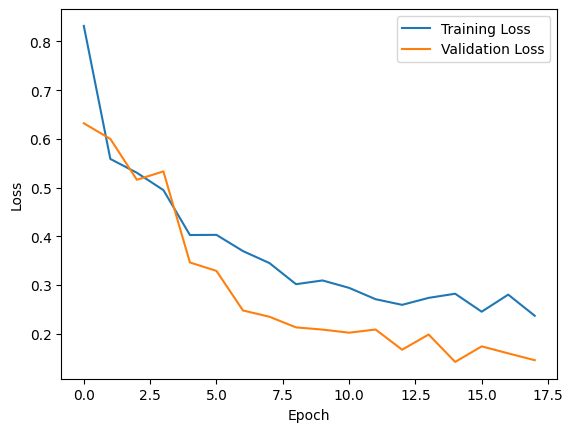

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


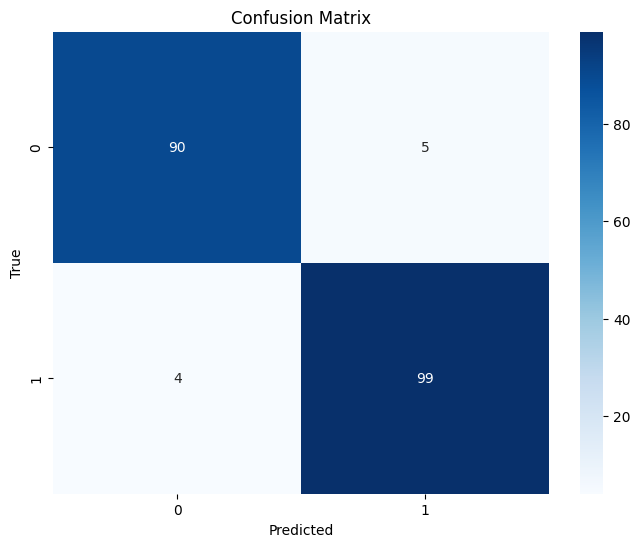

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


7/7 [==============================] - 1s 131ms/step


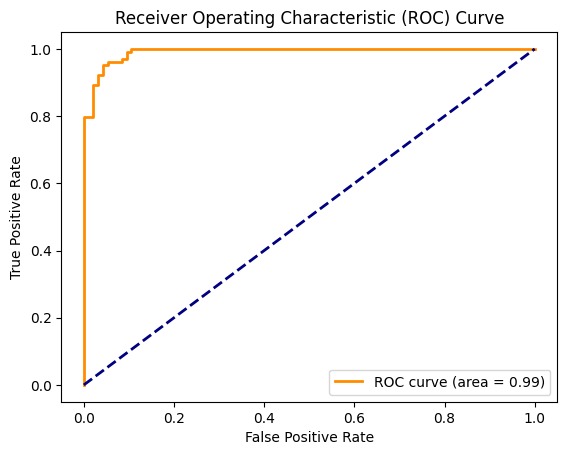

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_prob = model.predict(X_test_normalized)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
###########################...............................Test images .......................##################################################

In [ ]:
from keras.models import load_model

# Load the saved model
model = load_model('/content/trainmodel/train_model.keras')


1/1 [==============================] - 1s 1s/step
Image 1: Fake - /content/download (1).jpg
Image 2: Real - /content/download (2).jpg


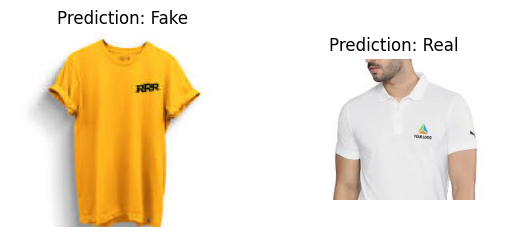

In [ ]:
from PIL import Image
import numpy as np

# Load and preprocess new images
new_image_paths = ["/content/real_image.png","/content/fake_image.png"]  # Add paths to your new images
new_images = []

for path in new_image_paths:
    img = Image.open(path).convert('RGB').resize((224, 224))
    img_array = np.array(img)
    img_array = img_array / 255.0  # Normalize
    new_images.append(img_array)

new_images = np.array(new_images)

# Make predictions
predictions = model.predict(new_images)
binary_predictions = (predictions > 0.7).astype(int)

# Display results with images
for i, (path, prediction) in enumerate(zip(new_image_paths, binary_predictions)):
    label = "Real" if prediction == 0 else "Fake"

    # Load and display the image
    img = Image.open(path)
    plt.subplot(1, len(new_image_paths), i + 1)
    plt.imshow(img)
    plt.title(f"Prediction: {label}")
    plt.axis("off")

    print(f"Image {i + 1}: {label} - {path}")

plt.show()

In [ ]:
predictions

array([[0.96501   ],
       [0.35604045]], dtype=float32)

In [ ]:
#############################################################################################################

In [ ]:
                         ####################################################